# Assignment 3: K-means

### Names of group members (max 2):
    Olga (Siemieniuk)
    Konstantinos Benjamin (Vigos)

In [1]:
# importing the required modules
%pip install numpy matplotlib #installs them if they are not yet there
import numpy as np 
import matplotlib.pyplot as plt
# to get matplot figures render correctly in the notebook use:
%matplotlib inline 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\Konstantinos\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#installs': Expected package name at the start of dependency specifier
    #installs
    ^


## Part 1: Coding and testing the Kmeans algorithm

### Load and Inspect the Data

In [2]:
## the data set for testing

df = np.array([ [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
                [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24] ])

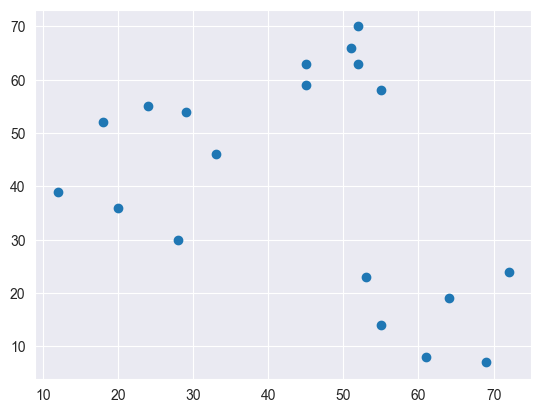

In [3]:
# Quick scatterplot for yourself, can you imagine what the cluster should be?

plt.scatter(df[0], df[1])
plt.show()



### Method 1. Using Kmeans form package sklearn.

<ul>
    <li> Make a plot function that gives the same colour to data points within one cluster. 
    </li>
    <li> Call KMeans from the package. (Consult the sklearn manual online and figure out how to do it.)
    </li>
    <li> Plot next to the data points also the centres of the clusters ($Z_j$)
    </li>
 </ul>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

k = 3 ## the number of clusters

def plotclusters(data, k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    labels = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_
    
    for i in range(k):
        cluster_points = data[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
        
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', label='Centers')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('KMeans Clustering')
    plt.legend()
    plt.show()
    
#testing the plotclusters function
plotclusters(df.T, k=3)

KeyboardInterrupt: 

### Method 2. Code yourself: A heuristic, simple, fast, pretty good algorithm.

<ol>
    <li> Initialization. Choose k random points as centres; plot the data black, the three centers in colour
    </li>
    <li> Function: assigmnent. Compute for every data point the closest centre: assign the data point to that cluster.
    </li>
    <li> Function: replace. Put all centres as the average of the data in their cluster.
    </li>
    <li> Script. Repeat assignment, replace, plotclusters until nothing changes. 
    </li>
 </ol>

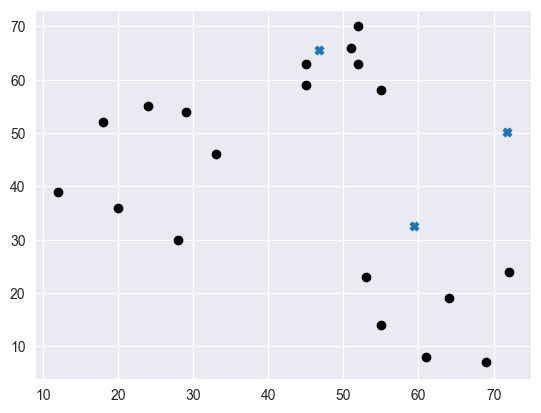

In [40]:
## Part 1. Initialization.
k = 3

def initialize(data, k):
    centers = np.random.uniform(np.min(data), np.max(data), size=(k,2))
    plt.scatter(data[0], data[1], color='black', label='Data')
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', label='Centers')
    return centers
    
centers = initialize(df, k)

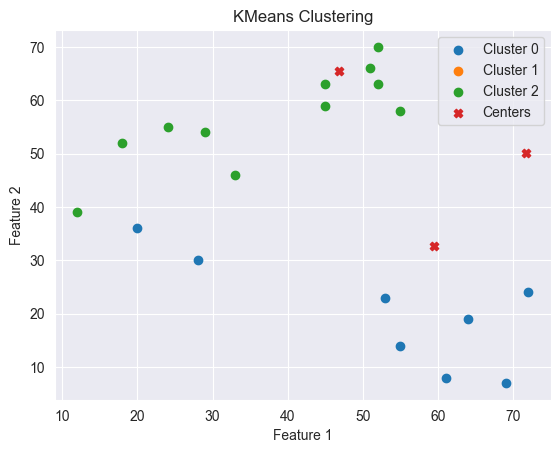

In [48]:
## Part 2. Function: assigmnent.

#Inputs:
#   centers : (k x 2) array containing the centers of the clusters
#   data : (2 x N) array of the data to be split

#Output:
#   labels : (1 x N) array containing the labels of the data

def assign(centers, data):
    labels = []
    data = data.T
    
    for point in data:
        distance = [np.linalg.norm(point - center) for center in centers]
        labels.append(distance.index(min(distance)))
    
    labels = np.array(labels)

        
    for i in range(k):
        cluster_points = data[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')
        
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', label='Centers')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('KMeans Clustering')
    plt.legend()
    plt.show()
    
    return labels
    
labels = assign(centers, df)


In [62]:
## Part 3. Function: replace.
def replace(labels, data):
    data = data.T
    centers = []
    for i in range(k):
        cluster_points = data[labels == i]
        Nk = len(cluster_points)
        if Nk != 0:
            centers.append(1/Nk*np.sum(cluster_points, axis=0))
        else:
            centers.append(np.random.uniform(np.min(data), np.max(data), size=(2)))
        
    
    return centers
    
centers = replace(labels, df)

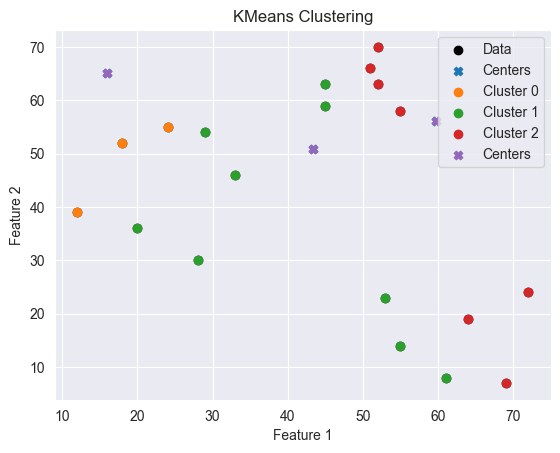

TypeError: list indices must be integers or slices, not tuple

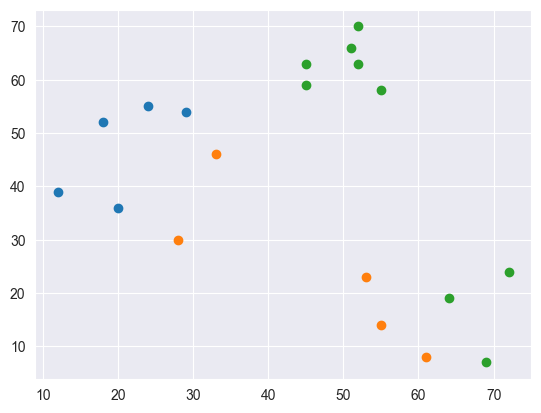

In [80]:
## Part 4. Script.
def train(k, data):
    centers = initialize(data, k)
    previous = np.zeros((k,2))
    while not np.array_equal(centers, previous):
        previous = centers
        labels = assign(centers, data)
        centers = replace(labels, data)
        
train(k, df)

# Part 2: Apply Kmeans to Wines database
    
### Let's start by thanking the creators of the dataset that we will be using:

Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

## Loading and Inspecting the Data

In [7]:
# importing the required modules
%pip install numpy matplotlib seaborn pandas scikit-learn #installs them if they are not yet there
import numpy as np 
import matplotlib.pyplot as plt
# to get matplot figures render correctly in the notebook use:
%matplotlib inline 
import pandas as pd
import seaborn as sns

rwine = pd.read_csv('winequality-red.csv', sep=';')  # Makes Pandas objects
wwine = pd.read_csv('winequality-white.csv', sep=';') 


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\Konstantinos\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#installs': Expected package name at the start of dependency specifier
    #installs
    ^


Note: you may need to restart the kernel to use updated packages.


FileNotFoundError: [Errno 2] No such file or directory: 'winequality-red.csv'

In [ ]:
# You may analyse the dataset of the wine of your choosing (red or white):
wines = 'your wine here'.sample(frac = 1)

# We just drop the 'quality' from the dataset:
wines_noquality=wines.drop('quality', axis=1)
# the number of samples M in the total combined set is still the same
M = len(wines_noquality)
# the number of features N (excluding the bias) are now all (excluding f='quality'):
N =  wines_noquality.shape[1]
wines_noquality.head() # We will use everything you see here.
X=np.zeros((M,N))
X[0:M,0:N]=wines_noquality[:][0:M]


### Prepare the data and reduce the dimensionelity of the feature space

<ol>
    <li>Feature scaling of all features in the database</li>
    <li>Do a Principle Component Analysis (PCA)</li>
    <li>Reduce the dimensionality of the feature space to 2 by projecting your samples along the first 2 principle component vector</li>
    <li>Plot your samples as a scatter plot in 2d</li>
    </ol>

In [ ]:
# Step 1: feature scaling
...

In [ ]:
# Step 2: PCA analyis
from sklearn.decomposition import PCA
...

In [ ]:
# Step 3: Project samples along PCA directions
...

In [ ]:
# Step 4: Scatterplot of sample in 2d plane spanned by the first 2 PCA vectors
...

### Kmeans cluster analysis in the plane spanned by the first 2 PCA vectors

<ol>
    <li>Do Kmeans clustering with either method 1 or method 2</li>
    <li>As a function of the number of centroids, plot the average distance of each sample to its centroid </li>
    <li>Determine a sensible number of clusters and explain why. You could try the 'elbow method'. What is the problem with not knowing the number of clusters? </li>
    <li>Plot the clusters in a scatterpot with different colors</li>
</ol>

In [ ]:
# Step 1:  Kmeans clustering 
...

In [ ]:
# Step 2:  Average distance to the k centroids
...

In [ ]:
# Step 3: Determine optimal k value
...